<a href="https://colab.research.google.com/github/jangvu/Project_by_me/blob/main/MLP_fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

Create a model to classify the items

In [ ]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]), keras.layers.BatchNormalization(),
keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"), keras.layers.BatchNormalization(),
keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"), keras.layers.BatchNormalization(),
keras.layers.Dense(10, activation="softmax")
])

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

Function that split the data to A and B

In [ ]:
import matplotlib.pyplot as plt


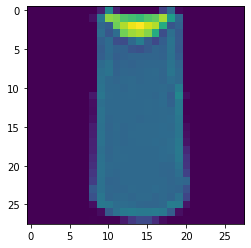

In [ ]:
plt.imshow(X_train_full[2])

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]


In [ ]:
print(X_train_A.shape)
np.unique(y_test_A)

(43986, 28, 28)


array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sneaker", "Bag", "Ankle boot"]


In [ ]:
class_names[y_valid[5]]

'Pullover'

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape =[28,28]),
                                 keras.layers.Dense(300,activation='relu',kernel_initializer='he_normal'),
                                 keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
                                 keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
                                 keras.layers.Dense(10,activation='softmax')])



In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
                  metrics=["accuracy"])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train_A,y_train_A,epochs = 10, callbacks = [early_stopping_cb],validation_data=(X_valid_A,y_valid_A))

Epoch 1/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.6805 - accuracy: 0.7907 - val_loss: 0.3339 - val_accuracy: 0.8884
Epoch 2/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3119 - accuracy: 0.8948 - val_loss: 0.3122 - val_accuracy: 0.8969
Epoch 3/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2801 - accuracy: 0.9063 - val_loss: 0.2584 - val_accuracy: 0.9183
Epoch 4/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2654 - accuracy: 0.9109 - val_loss: 0.2510 - val_accuracy: 0.9185
Epoch 5/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2501 - accuracy: 0.9150 - val_loss: 0.2738 - val_accuracy: 0.9101
Epoch 6/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2325 - accuracy: 0.9204 - val_loss: 0.2392 - val_accuracy: 0.9220
Epoch 7/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2263 - accuracy: 0.9216 - val_loss: 0.2417 - val_accuracy:

In [ ]:
model.evaluate(X_test_A,y_test_A)

250/250 [==============================] - 1s 3ms/step - loss: 38.7407 - accuracy: 0.9003


[38.74065017700195, 0.9002500176429749]

In [ ]:
y_pred = model.predict(X_test_A[:3])

In [ ]:
result = y_pred.argmax(-1).astype(int)
result

array([7, 2, 1])

In [ ]:
import numpy as np
np.array(class_names)[result]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
model.save('my_keras_model.h5')

In [ ]:
model_B = keras.models.Sequential([keras.layers.Flatten(input_shape =[28,28]),
                                 keras.layers.Dense(300,activation='relu',kernel_initializer='he_normal'),
                                 keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
                                 keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
                                 keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 43ms/step - loss: 0.6823 - accuracy: 0.5715 - val_loss: 0.6549 - val_accuracy: 0.6907
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 0.6484 - accuracy: 0.6910 - val_loss: 0.6282 - val_accuracy: 0.7809
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 0.6117 - accuracy: 0.8189 - val_loss: 0.6024 - val_accuracy: 0.8256
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 0.6037 - accuracy: 0.7926 - val_loss: 0.5811 - val_accuracy: 0.8458
Epoch 5/20
7/7 [==============================] - 0s 20ms/step - loss: 0.5767 - accuracy: 0.7943 - val_loss: 0.5636 - val_accuracy: 0.8469
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 0.5619 - accuracy: 0.8182 - val_loss: 0.5479 - val_accuracy: 0.8580
Epoch 7/20
7/7 [==============================] - 0s 19ms/step - loss: 0.5483 - accuracy: 0.8193 - val_loss: 0.5341 - val_accuracy: 0.8631
Epoch 8/20
7/7 [===========

In [ ]:
y_pred_B = model_B.predict(X_test_B[:3]).astype(int)

In [ ]:
print(y_pred_B)
print(y_test_B[:3])

[[1]
 [1]
 [0]]
[1. 1. 0.]


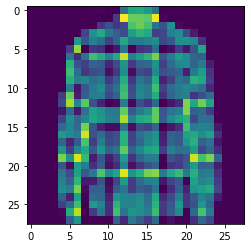

In [ ]:
plt.imshow(X_test_B[1])

In [ ]:
model_A = keras.models.load_model('my_keras_model.h5')

In [ ]:
model_A_clone = keras.models.clone_model(model_A)

In [ ]:
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
model_A_clone.layers[:-1]


In [ ]:
model_A_clone.layers

In [ ]:
model_B_on_A = keras.models.Sequential(model_A.layers[:-1]) 
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))


In [ ]:
for layer in model_B_on_A.layers[:-1]: 
  layer.trainable = False

In [ ]:
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=20,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 44ms/step - loss: 1.3505 - accuracy: 0.4414 - val_loss: 1.1762 - val_accuracy: 0.4625
Epoch 2/20
7/7 [==============================] - 0s 14ms/step - loss: 1.1473 - accuracy: 0.4726 - val_loss: 1.0663 - val_accuracy: 0.4594
Epoch 3/20
7/7 [==============================] - 0s 15ms/step - loss: 1.0277 - accuracy: 0.4998 - val_loss: 0.9684 - val_accuracy: 0.4584
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 0.9879 - accuracy: 0.4775 - val_loss: 0.8869 - val_accuracy: 0.4838
Epoch 5/20
7/7 [==============================] - 0s 14ms/step - loss: 0.8113 - accuracy: 0.5423 - val_loss: 0.8061 - val_accuracy: 0.5132
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 0.8029 - accuracy: 0.5099 - val_loss: 0.7452 - val_accuracy: 0.5538
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6993 - accuracy: 0.5653 - val_loss: 0.6936 - val_accuracy: 0.5974
Epoch 8/20
7/7 [===========

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=20,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 39ms/step - loss: 0.1323 - accuracy: 1.0000 - val_loss: 0.1543 - val_accuracy: 0.9949
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1447 - accuracy: 1.0000 - val_loss: 0.1495 - val_accuracy: 0.9949
Epoch 3/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1259 - accuracy: 1.0000 - val_loss: 0.1449 - val_accuracy: 0.9949
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1275 - accuracy: 1.0000 - val_loss: 0.1407 - val_accuracy: 0.9949
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1145 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.9949
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.1204 - accuracy: 1.0000 - val_loss: 0.1329 - val_accuracy: 0.9949
Epoch 7/20
7/7 [==============================] - 0s 19ms/step - loss: 0.1158 - accuracy: 1.0000 - val_loss: 0.1295 - val_accuracy: 0.9949
Epoch 8/20
7/7 [===========

In [ ]:
model_B.evaluate(X_test_B, y_test_B)


63/63 [==============================] - 0s 2ms/step - loss: 3.2432 - accuracy: 0.9260


[3.243155002593994, 0.9259999990463257]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)


63/63 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.9965


[0.29833555221557617, 0.9965000152587891]